In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, ReLU, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

%matplotlib inline 

In [2]:
train_set = h5py.File('datasets/train_signs.h5', "r")
test_set = h5py.File('datasets/test_signs.h5', "r")

In [3]:
X_train = np.array(train_set["train_set_x"][:]) / 255.
y_train = np.array(train_set["train_set_y"][:])

In [4]:
X_test = np.array(test_set["test_set_x"][:]) / 255.
y_test = np.array(test_set["test_set_y"][:])

In [6]:
classes = np.array(test_set["list_classes"][:])

In [7]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=6)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=6)

In [8]:
print("Number of training examples =", X_train.shape[0])
print("Number of test examples =", X_test.shape[0])
print("X_train shape:", X_train.shape)
print("Y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", y_test.shape)

Number of training examples = 1080
Number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


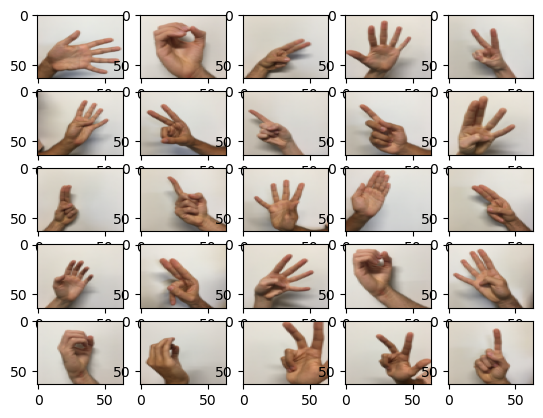

In [11]:
fig, ax = plt.subplots(5, 5)
k = 0

for i in range(5):
    for j in range(5):
        ax[i][j].imshow(X_train[k], aspect='auto')
        k += 1

plt.show()

In [22]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation='relu', input_shape=X_train.shape[1:]),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])

In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 batch_normalization_2 (Batc  (None, 64, 64, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 32768)             0         
                                                                 
 dropout_1 (Dropout)         (None, 32768)             0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [24]:
history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/30
17/17 [==============================] - 8s 383ms/step - loss: 5.9721 - accuracy: 0.2713 - val_loss: 2.2297 - val_accuracy: 0.1667
Epoch 2/30
17/17 [==============================] - 6s 369ms/step - loss: 1.2872 - accuracy: 0.5046 - val_loss: 2.1381 - val_accuracy: 0.1667
Epoch 3/30
17/17 [==============================] - 6s 373ms/step - loss: 0.7953 - accuracy: 0.7528 - val_loss: 2.1071 - val_accuracy: 0.1667
Epoch 4/30
17/17 [==============================] - 6s 366ms/step - loss: 0.5250 - accuracy: 0.8417 - val_loss: 1.9580 - val_accuracy: 0.1750
Epoch 5/30
17/17 [==============================] - 6s 378ms/step - loss: 0.3371 - accuracy: 0.8981 - val_loss: 1.6501 - val_accuracy: 0.2083
Epoch 6/30
17/17 [==============================] - 6s 381ms/step - loss: 0.2204 - accuracy: 0.9472 - val_loss: 1.4718 - val_accuracy: 0.3000
Epoch 7/30
17/17 [==============================] - 6s 371ms/step - loss: 0.1307 - accuracy: 0.9759 - val_loss: 1.3652 - val_accuracy: 0.4417
Epoch 

[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

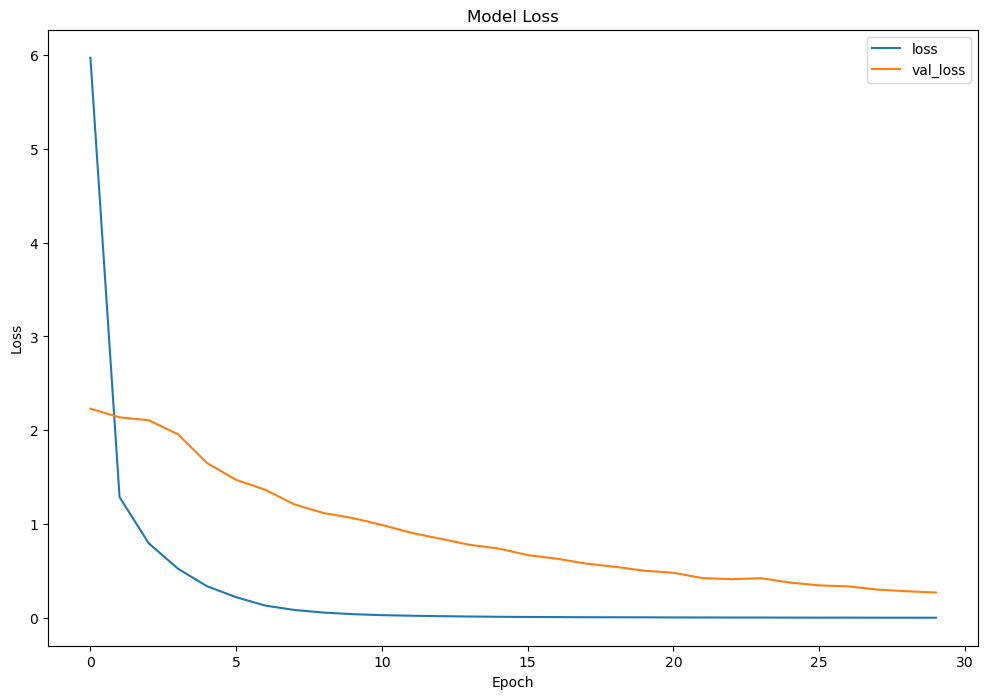

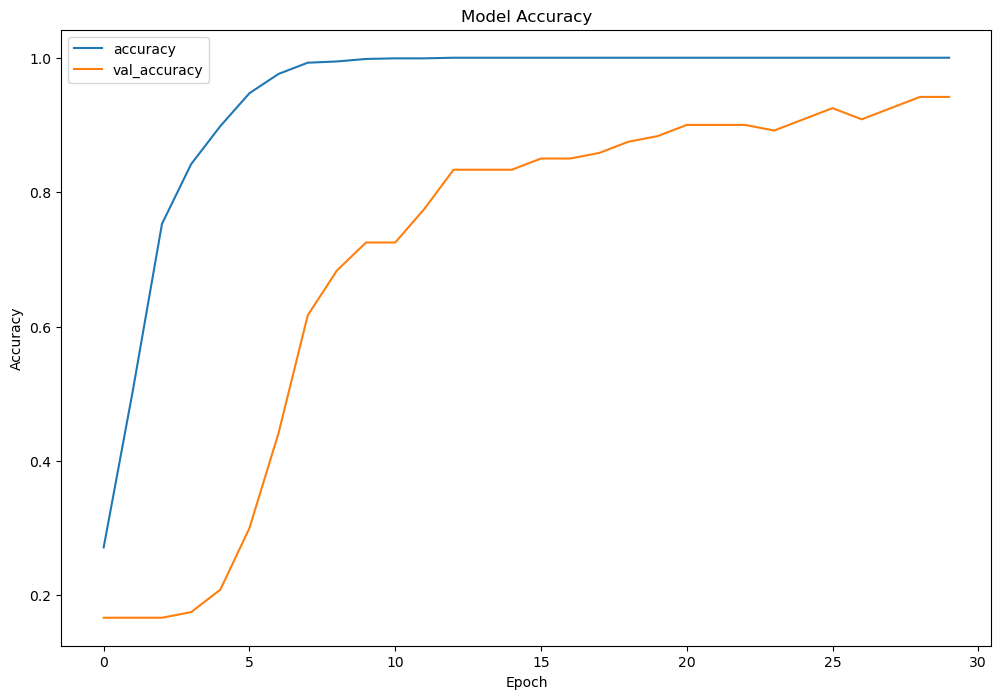

In [27]:
df_loss_acc = pd.DataFrame(history.history)
df_loss_acc[['loss', 'val_loss']].plot(title='Model Loss', figsize=(12, 8)).set(xlabel='Epoch', ylabel='Loss')
df_loss_acc[['accuracy', 'val_accuracy']].plot(title='Model Accuracy', figsize=(12, 8)).set(xlabel='Epoch', ylabel='Accuracy')
